___
# Projeto 2 - Ciência dos Dados 2020.2
___

### *Objetivo:*
Nosso objetivo é...

In [1]:
# Importanto bibliotecas 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from math import *

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


%matplotlib inline

In [2]:
# Abrindo o dataset e transformando em dataframes
data_mat = pd.read_csv('archive/student-mat.csv')
data_por = pd.read_csv('archive/student-por.csv')


## Índice 
- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - 1 hour)
- studytime - weekly study time (numeric: 1 - 10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

___
# Conhecendo os dados:

In [3]:
# Visualizando os dados dos alunos na matéria de Math 
data_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Visualizando os dados dos alunos na matéria de Portuguese
data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13



*Juntaremos os dataframes, já que não não há a necessidade da separação de matérias para o nosso modelo*


In [5]:
# Juntando os dataframes
data = pd.concat([data_mat,data_por])
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# Análise superficial dos tipos de dados e possíveis nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [7]:
sum(data.isnull().sum())

0

In [8]:
# Identificando features numéricas
num_data = data.select_dtypes(include=[np.number]).columns
num_data

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [9]:
# Identificando features categóricas
cat_data = data.select_dtypes(exclude=[np.number]).columns
cat_data

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


*Devido ao fato de algumas features apresentarem dados categóricos em forma de números, transformaremos-as em categorias:*


In [10]:
# Identificando variáveis númericas que na verdade são categóricas
num_to_cat = ['Medu','Fedu','famrel','freetime','goout','freetime','Dalc','Walc','health',]

for column in num_to_cat:
    data[column] = data[column].astype('category')

In [11]:
# Associando novamente os tipos de variáveis 
num_data = data.select_dtypes(include=[np.number]).columns
cat_data = data.select_dtypes(exclude=[np.number]).columns

print('VARIÁVEIS NÚMERICAS:')
print('')
print(num_data)
print('')
print('='*80)
print('')
print('VARIÁVEIS CATEGÓRICAS:')
print('')
print(cat_data)

VARIÁVEIS NÚMERICAS:

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


VARIÁVEIS CATEGÓRICAS:

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health'],
      dtype='object')


___
# Separação do dataframe entre treino e teste 

In [12]:
from sklearn import model_selection

train, test = model_selection.train_test_split(data, test_size=0.3, random_state=42, shuffle=True)

print('O nosso treino possui {} linhas e o nosso teste possui {}'.format(train.shape[0], test.shape[0]))

O nosso treino possui 730 linhas e o nosso teste possui 314


___
# Análise Exploratória


## Análise numérica

In [13]:
# Para termos um panorama dos nossos dados, utilizaremos o .describe()
data.describe()

,age,traveltime,studytime,failures,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,1.522989,1.970307,0.264368,4.434866,11.213602,11.246169,11.341954
std,1.239975,0.731727,0.834353,0.656142,6.210017,2.983394,3.285071,3.864796
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,1.000000,2.000000,0.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,2.000000,0.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,75.000000,19.000000,19.000000,20.000000


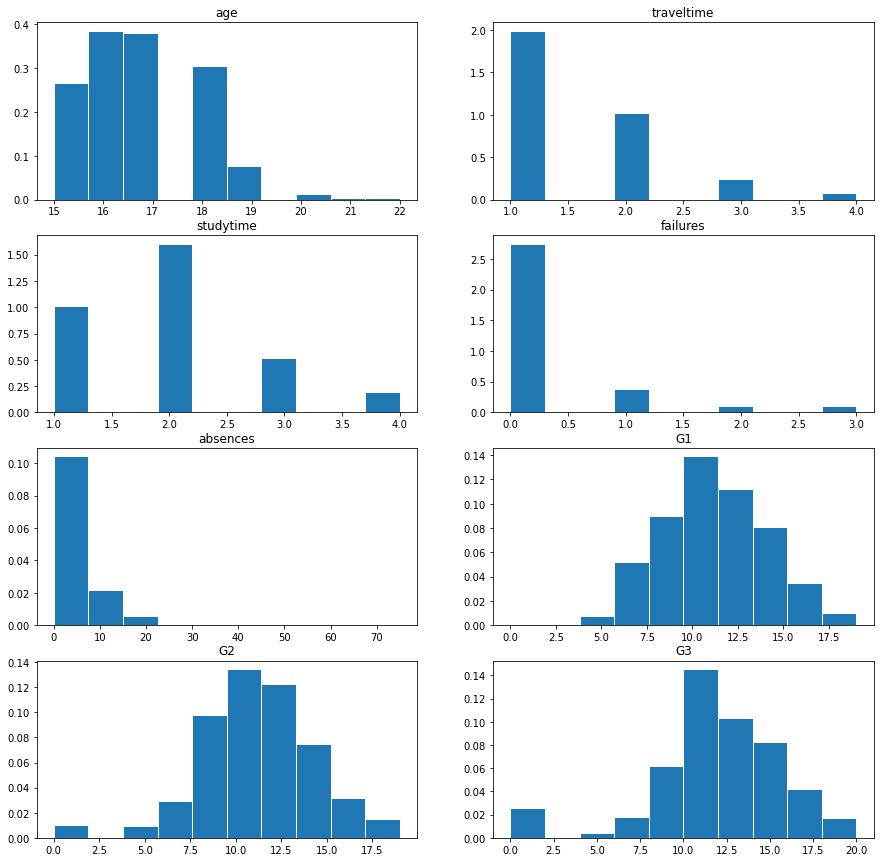

In [14]:
# Para observarmos o comportamento dos dados de maneira visual, plotaremos histogramas
plt.figure(figsize = (15,15))
for i in enumerate(num_data):
    plt.subplot(4,2,i[0]+1)
    plt.hist(data[i[1]], edgecolor = 'white', density = True)
    plt.title(i[1])

*Podemos observar que as notas de cada período aparentam apresentar uma distruibuição normal*

                 age  traveltime  studytime  failures  absences        G1  \
age         1.000000    0.049216  -0.007870  0.282364  0.153196 -0.124121   
traveltime  0.049216    1.000000  -0.081328  0.087177 -0.022669 -0.121053   
studytime  -0.007870   -0.081328   1.000000 -0.152024 -0.075594  0.211314   
failures    0.282364    0.087177  -0.152024  1.000000  0.099998 -0.374175   
absences    0.153196   -0.022669  -0.075594  0.099998  1.000000 -0.092425   
G1         -0.124121   -0.121053   0.211314 -0.374175 -0.092425  1.000000   
G2         -0.119475   -0.140163   0.183167 -0.377172 -0.089332  0.858739   
G3         -0.125282   -0.102627   0.161629 -0.383145 -0.045671  0.809142   

                  G2        G3  
age        -0.119475 -0.125282  
traveltime -0.140163 -0.102627  
studytime   0.183167  0.161629  
failures   -0.377172 -0.383145  
absences   -0.089332 -0.045671  
G1          0.858739  0.809142  
G2          1.000000  0.910743  
G3          0.910743  1.000000  


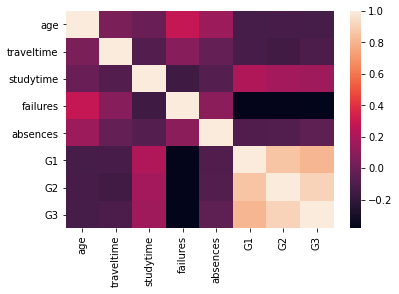

In [15]:
# Calcularemos as correlações das variáveis númericas. Utilizaremos um heatmap para podermos ter uma visualização melhor
print(data.corr())
sns.heatmap(data.corr())
plt.show()

___
## Análise categórica

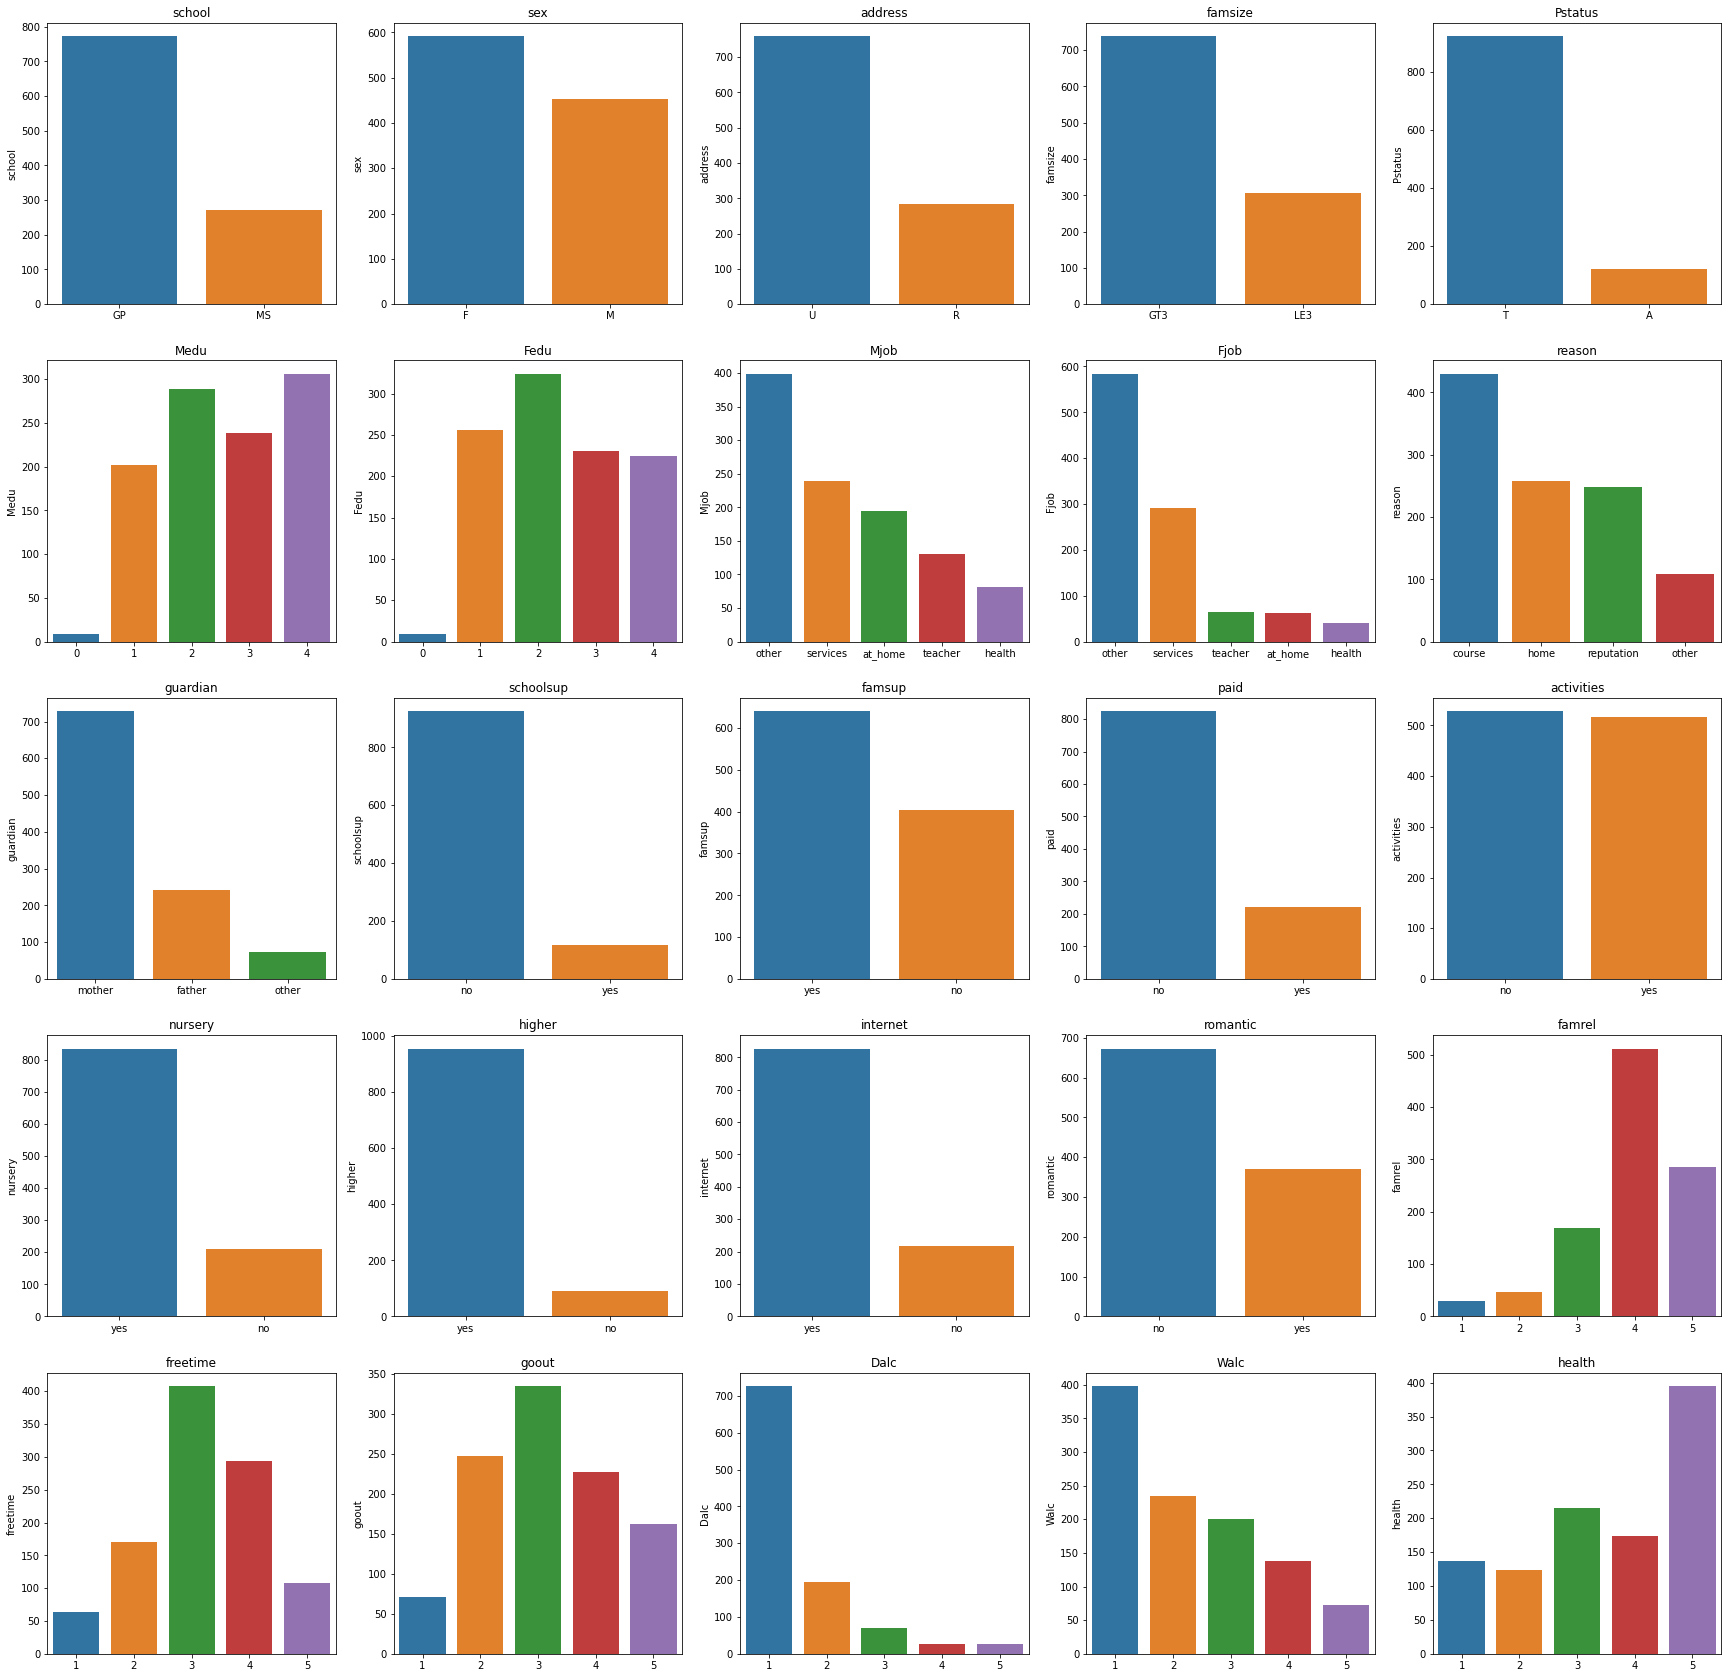

In [16]:
# Agora, analisaremos as variáveis categóricas
# utilizaremos os gráficos de barra para podermos ter visão clara das features
plt.figure(figsize = (30,30))
for i in enumerate(cat_data):
    plt.subplot(5,5,i[0]+1)
    sns.barplot(data[i[1]].value_counts().index, data[i[1]].value_counts()).set_title(i[1])

In [17]:
data.groupby(by = 'Dalc')['G1', 'G2','G3'].mean()

,G1,G2,G3
Dalc,,,
1,11.492435,11.536451,11.704264
2,10.790816,10.719388,10.556122
3,10.492754,10.666667,10.898551
4,9.884615,9.576923,9.269231
5,9.846154,10.307692,10.384615


In [18]:
data.groupby(by = 'Walc')['G1', 'G2','G3'].mean()

,G1,G2,G3
Walc,,,
1,11.494975,11.610553,11.743719
2,11.574468,11.382979,11.472340
3,11.160000,11.265000,11.290000
4,10.405797,10.376812,10.536232
5,10.191781,10.410959,10.397260
